<a href="https://colab.research.google.com/github/yk-Jeong/KNOU/blob/main/2022_python/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%8A%A4%ED%84%B0%EB%94%94_20%EC%A3%BC%EC%B0%A8(20220916).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. 내부함수 

In [ ]:
x = 0 
def outer():
  x = 1
  def inner():
    x = 2
    print("inner:", x)
  inner()
  print("outer:", x)

outer()
print("global:", x)

inner: 2
outer: 1
global: 0


nonlocal과 global 함수 

In [ ]:
x = 0
def outer():
  x = 1
  def inner():
    global x 
    x = 2
    print("inner:", x)
  inner()
  print("outer:", x)

In [ ]:
outer()
print("global:", x)

inner: 2
outer: 1
global: 2


3. closer

- 파이썬은 모든 것을 객체로 처리함: 함수를 변수에 할당할 수 있고, 다른 함수에서 인수로 사용할 수도 있으며, 함수에서 반환값으로 사용할 수도 있다. 

- 사용 조건: 

1) 함수가 중첩되어 있는 형태여야 한다. 

2) 내부 함수는 자신을 감싸고 있는 외부 함수의 변수를 참조하고 있어야 한다. 

3) 외부 함수는 내부 함수 자체를 반환해야 한다. 이러한 클로저는 전역변수를 사용하지 않고, 내부 데이터를 숨기는 용도로 활용할 수 있다. 

In [ ]:
# example

def add(a, b):
  return a + b


x = add
x(10, 20)

30

print_Hello() 함수는 print_msg()함수를 호출하는 것이 ~아니라~ 함수 자체를 반환한다. 

따라서 수행 결과가 아닌, *함수의 위치*를 반환한다. 

In [ ]:
def print_Hello(name):
  name = name
  def print_msg():
    print("Hello", name)
  return print_msg

print_Hello("Kim")

<function __main__.print_Hello.<locals>.print_msg()>

함수를 변수로 할당하기

In [ ]:
p = print_Hello("Kim")
p

<function __main__.print_Hello.<locals>.print_msg()>

In [ ]:
p()

Hello Kim


이미 변수에 할당된 함수는 `del`로 삭제하여도 호출할 수 있음

In [ ]:
del print_Hello
print_Hello("Kim")

NameError: ignored

In [ ]:
p()

Hello Kim


C의 포인터처럼 주소값만 받아오는 것 또는 원본을 가리키는 것이 아니라는 점에 주목해보자 

In [ ]:
print(print_Hello("Kim"))
print(p) # 위치도 다르다! 

<function print_Hello.<locals>.print_msg at 0x7f6035d07b00>
<function print_Hello.<locals>.print_msg at 0x7f6035ce0440>


4. 데코레이터
- 하나의 함수를 취해서 또 다른 함수를 반환하는 함수 

In [ ]:
def print_Hello():
  print("=" * 30)
  print("Hello")
  print("=" * 30)

def print_World():
  print("=" * 30)
  print("World!")
  print("=" * 30)

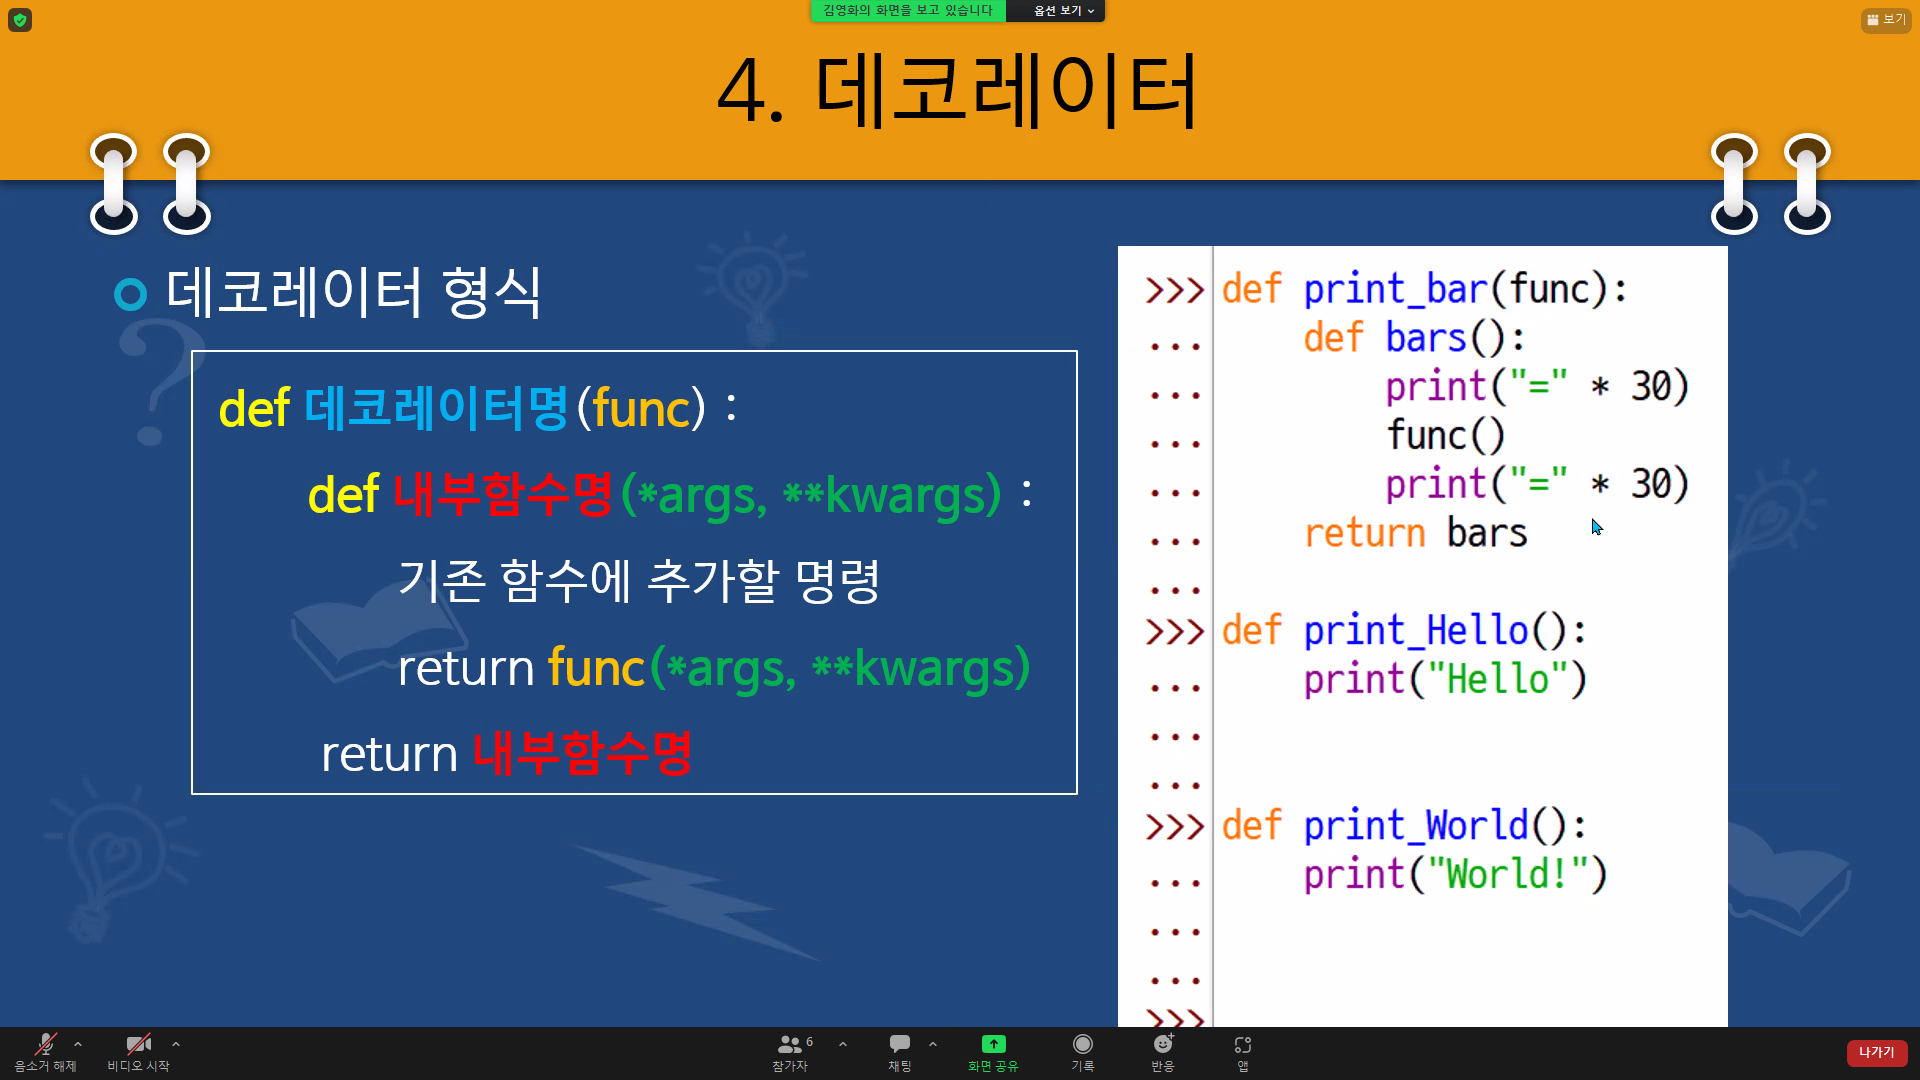

In [ ]:
# 중복되는 부분이 많으니, 함수를 허나만으로 써먹을 수 있게 하자! 

def print_bar(func):
  def bars():
    print("=" * 30)
    func()
    print("=" * 30)
    return 
  return bars

def print_Hello():
  print("Hello")

def print_World():
  print("World!")

In [ ]:
hello = print_bar(print_Hello)
hello()

Hello


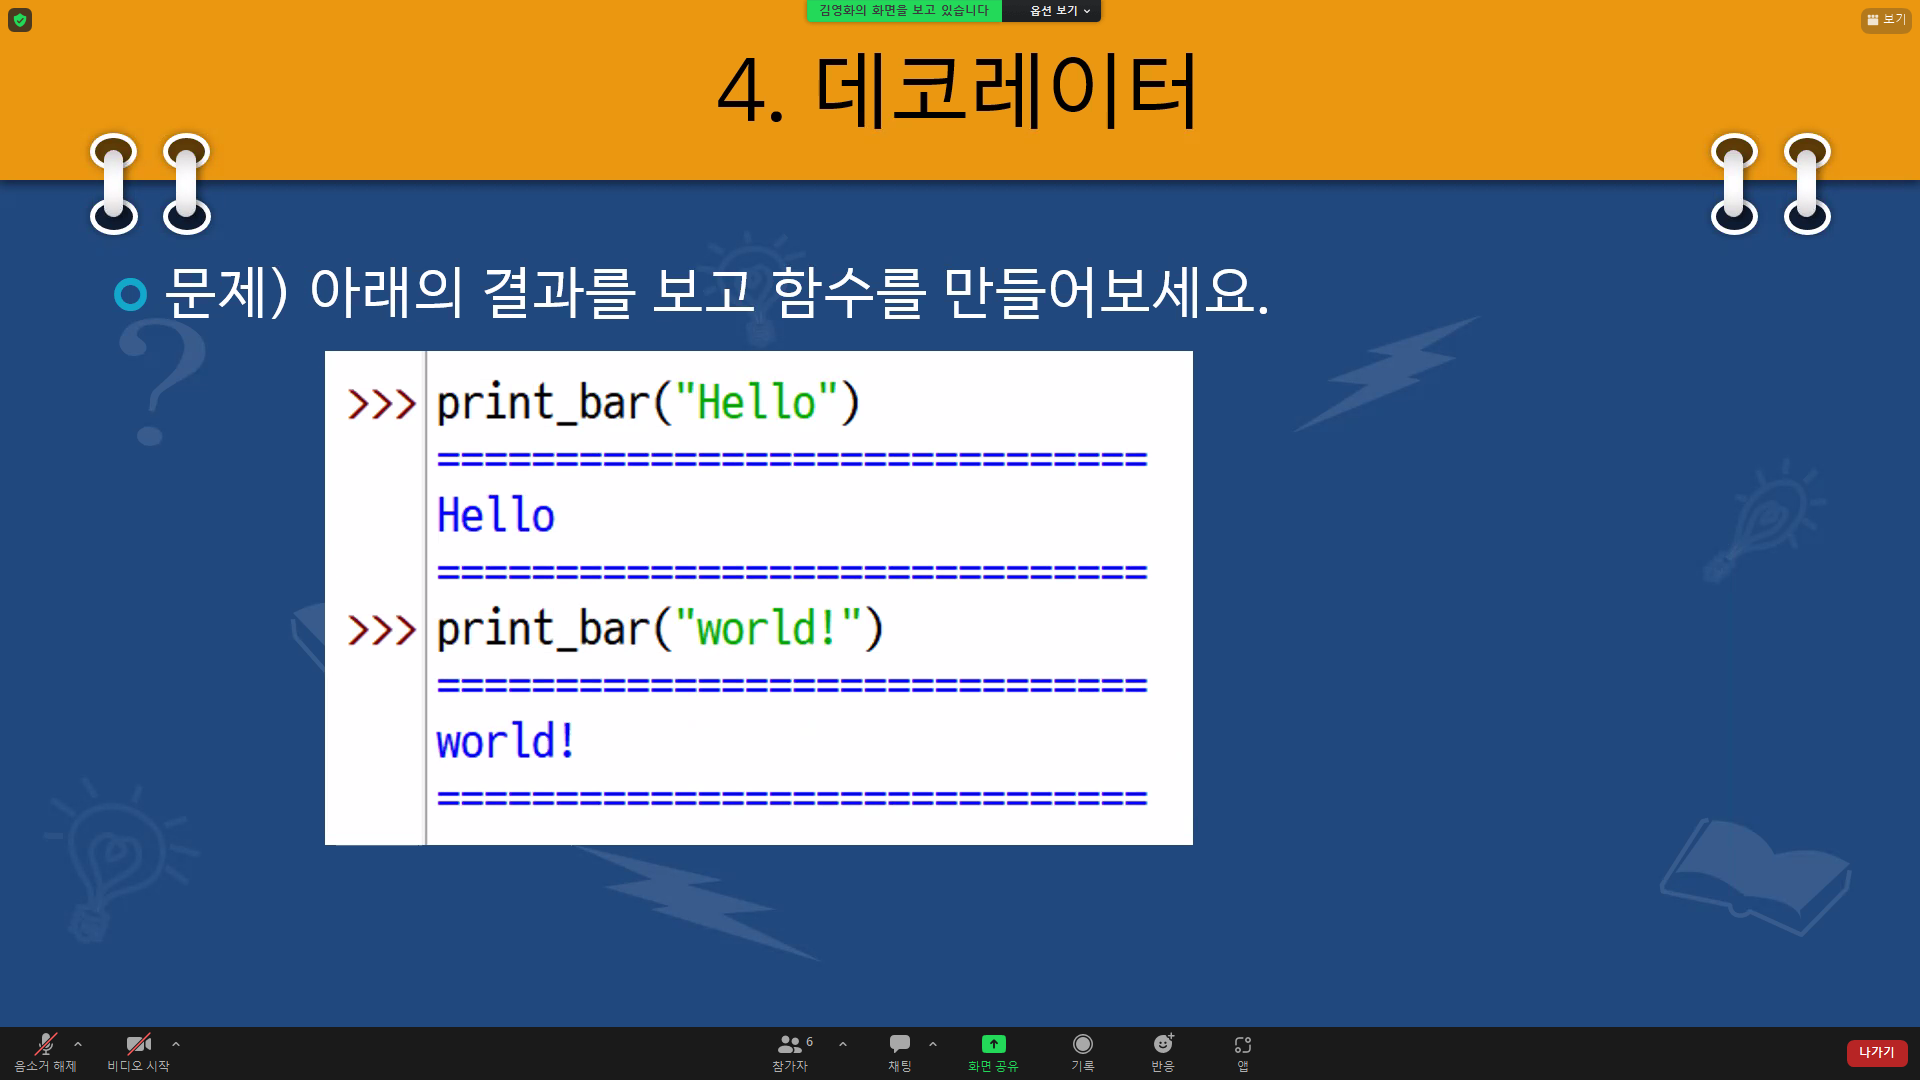

In [ ]:
def print_bar(text):
  print("=" * 30)
  print(text)
  print("=" * 30)

In [ ]:
print_bar("Hello")

Hello


In [ ]:
print_bar("world!")

world!


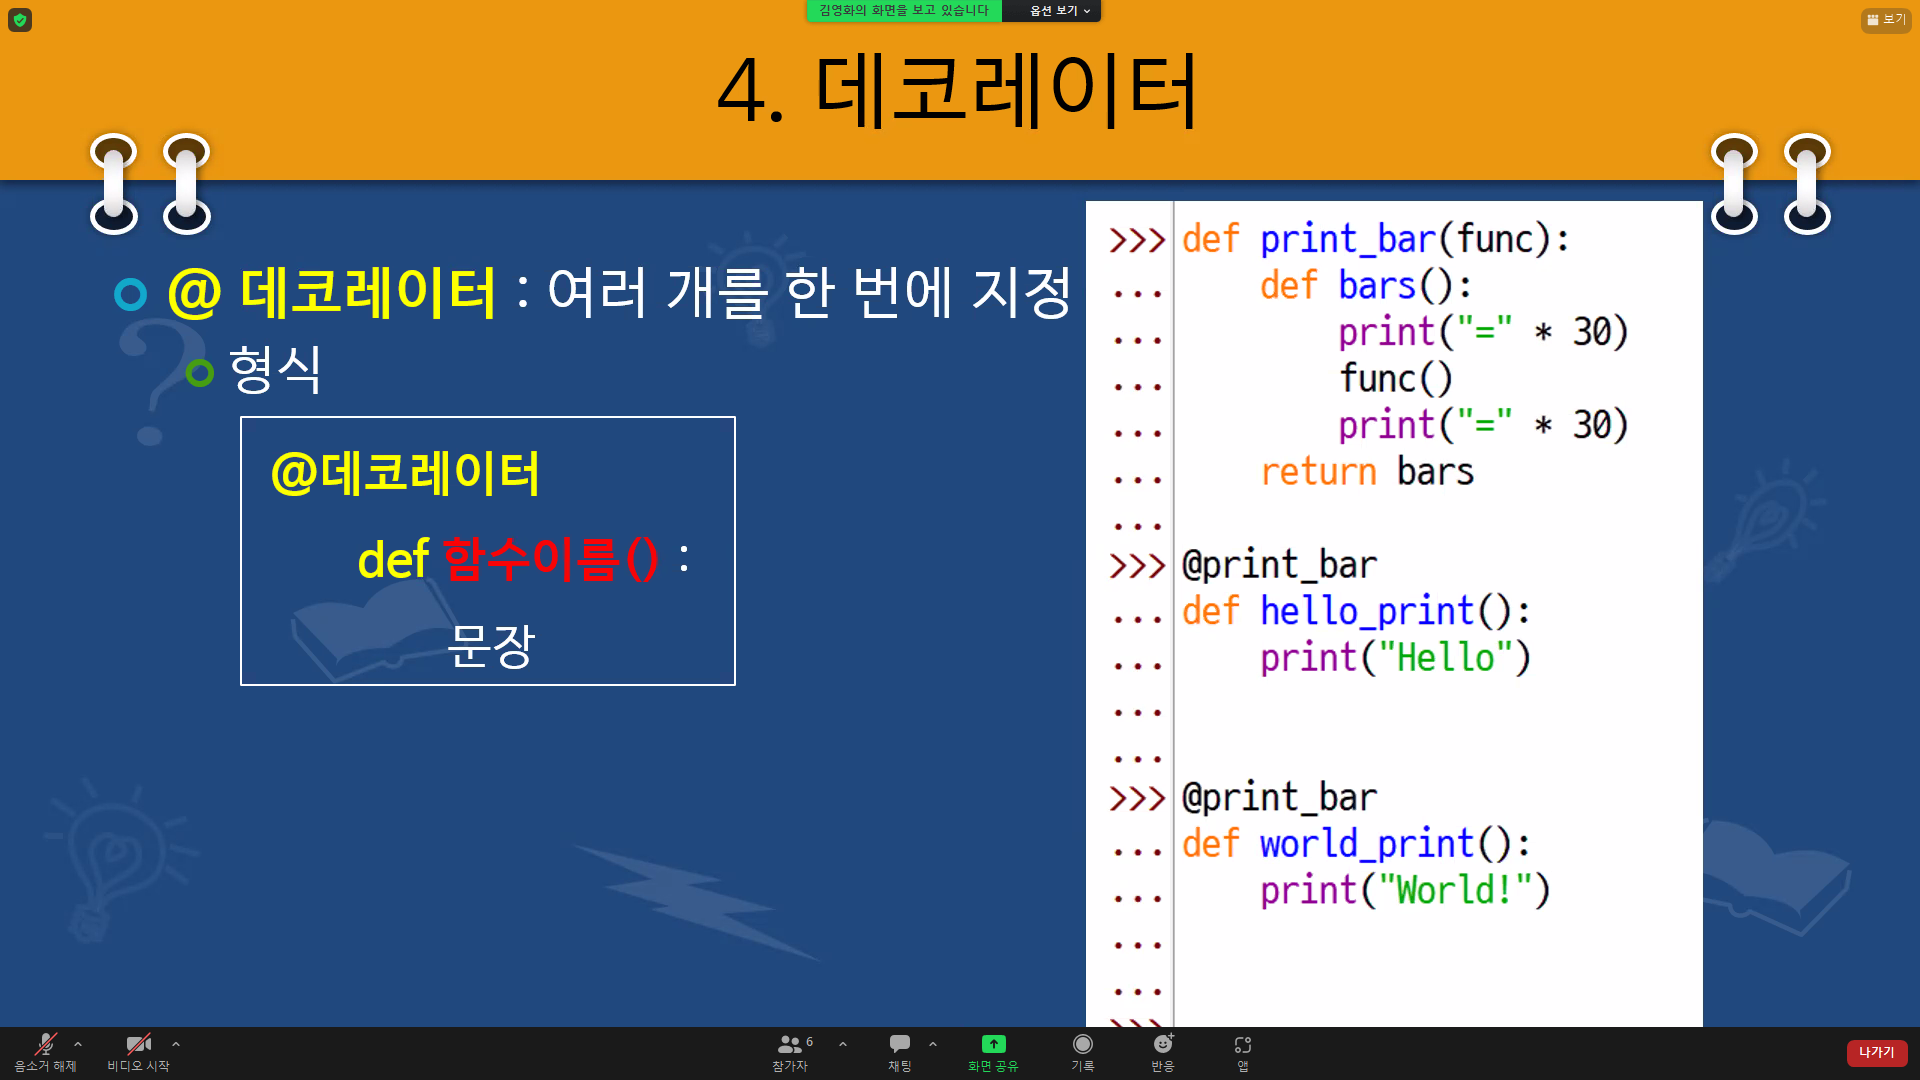

In [ ]:
def print_bar(func):
  def bars():
    print("=" * 30)
    func()
    print("=" * 30)
  return bars

@print_bar
def hello_print():
  print("Hello")

@print_bar
def world_print():
  print("World!")

In [ ]:
hello_print()

Hello


In [ ]:
def up_bar(func):
  def bars():
    print("=" * 30)
    func()
  return bars

def down_bar(func):
  def bars():
    func()
    print("=" * 30)
  return bars

In [ ]:
@up_bar
@down_bar

def hello_world():
  print("hello World!")

In [ ]:
hello_world()

hello World!
